# Languages of India

I was just curious about what languages were spoken in which regions of india.

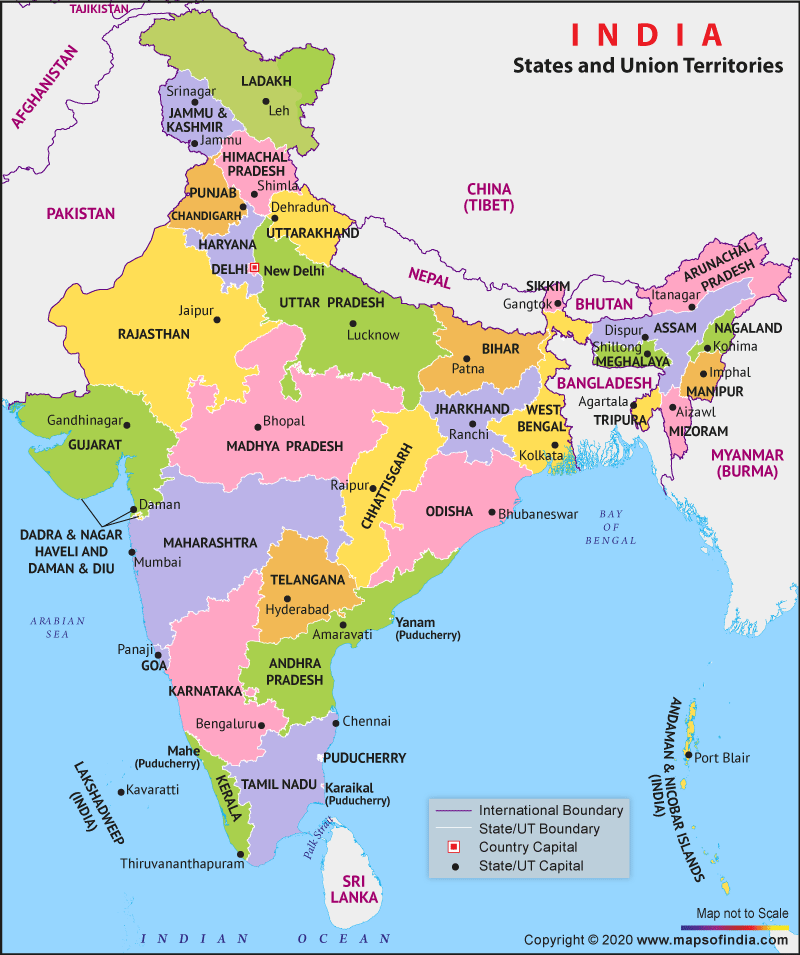

In [84]:
from IPython.display import Image
# from https://www.mapsofindia.com/maps/india/india-political-map.htm
Image("india-political-map.gif")

The first question I wanted to know is what are the dominent languages of the indian states and provinces. I have taken data from the indian census from 2011

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

In [86]:
# from https://censusindia.gov.in/2011census/C-16.html
df_og = pd.read_excel('indianlanguages.xlsx')
df_og

Area name  Mother tongue code Mother tongue name  \
0                            NaN                 NaN                NaN   
1                            NaN                 NaN                NaN   
2                          INDIA              1000.0         1 ASSAMESE   
3                          INDIA              1002.0           Assamese   
4                          INDIA              1999.0           1 Others   
...                          ...                 ...                ...   
10330  ANDAMAN & NICOBAR ISLANDS            122000.0          122 ZEMI    
10331  ANDAMAN & NICOBAR ISLANDS            122003.0               Zemi   
10332  ANDAMAN & NICOBAR ISLANDS            123000.0           123 ZOU    
10333  ANDAMAN & NICOBAR ISLANDS            123001.0                Zou   
10334  ANDAMAN & NICOBAR ISLANDS            124000.0         124 OTHERS   

          Total Unnamed: 4 Unnamed: 5     Rural Unnamed: 7 Unnamed: 8  \
0             P          M          F         P          M          F   
1           NaN        NaN        NaN       NaN        NaN        NaN   
2      15311351    7810583    7500768  13144701    6697715    6446986   
3      14816414    7555350    7261064  12680101    6458345    6221756   
4        494937     255233     239704    464600     239370     225230   
...         ...        ...        ...       ...        ...        ...   
10330         2          2          0         1          1          0   
10331         2          2          0         1          1          0   
10332         2          2          0         0          0          0   
10333         2          2          0         0          0          0   
10334      2915       1494       1421      2747       1410       1337   

         Urban Unnamed: 10 Unnamed: 11  
0            P           M           F  
1          NaN         NaN         NaN  
2      2166650     1112868     1053782  
3      2136313     1097005     1039308  
4        30337       15863       14474  
...        ...         ...         ...  
10330        1           1           0  
10331        1           1           0  
10332        2           2           0  
10333        2           2           0  
10334      168          84          84  

[10335 rows x 12 columns]

I am only interested in the total column at the moment, and so much the genders or whether the person lives in a rural or urban setting. So let us simplify the dataframe a little.
Let's split this up into two dataframes one for the all of india, and the another for all the states and unions.

In [87]:
languages = df_og.iloc[2:,:4]

languages[['Mother tongue code','Total']] = languages[['Mother tongue code', 'Total']].astype(int)

# The mother tongue codes which end in 000 are the parent languages, filter the dataframe by those 
languages = languages[languages['Mother tongue code'].apply(lambda code: code % 1000 == 0)]
# Strip the numbers from the start of the 'Mother tongue name' column
languages['Mother tongue name'] = languages['Mother tongue name'].str.replace('\d+\s','', regex=True)


# languages of india as a whole
lang_of_india = languages[languages['Area name'] == 'INDIA']

display(lang_of_india)

# languages of indian states
lang_indian_states = languages[languages['Area name'] != 'INDIA']

display(lang_indian_states)

Area name  Mother tongue code Mother tongue name     Total
2       INDIA                1000           ASSAMESE  15311351
5       INDIA                2000           BENGALI   97237669
11      INDIA                3000              BODO    1482929
16      INDIA                4000             DOGRI    2596767
19      INDIA                5000           GUJARATI  55492554
..        ...                 ...                ...       ...
466     INDIA              120000         YIMCHUNGRE     83259
471     INDIA              121000           ZELIANG      63529
473     INDIA              122000              ZEMI      50925
476     INDIA              123000               ZOU      26545
478     INDIA              124000             OTHERS   1875542

[122 rows x 4 columns]

Area name  Mother tongue code Mother tongue name  \
479              JAMMU & KASHMIR                1000           ASSAMESE   
482              JAMMU & KASHMIR                2000           BENGALI    
488              JAMMU & KASHMIR                3000              BODO    
491              JAMMU & KASHMIR                4000             DOGRI    
493              JAMMU & KASHMIR                5000           GUJARATI   
...                          ...                 ...                ...   
10326  ANDAMAN & NICOBAR ISLANDS              116000           TRIPURI    
10328  ANDAMAN & NICOBAR ISLANDS              118000           VAIPHEI    
10330  ANDAMAN & NICOBAR ISLANDS              122000              ZEMI    
10332  ANDAMAN & NICOBAR ISLANDS              123000               ZOU    
10334  ANDAMAN & NICOBAR ISLANDS              124000             OTHERS   

         Total  
479       8340  
482      19830  
488        508  
491    2513712  
493      19261  
...        ...  
10326       26  
10328        5  
10330        2  
10332        2  
10334     2915  

[3116 rows x 4 columns]

## languages of India as a whole

Here we will analyse the languages of india as a whole.

Just before we create some bar graphs I just wanted to check if the populations match up if I sum the Total column

In [88]:
display('Sum of the Total column: ' + str(sum(lang_filtered['Total'])))
display('Number of languages: ' + str(len(lang_filtered) - 1) + " (Not including the last entry which is just 'OTHER' languages)")

'Sum of the Total column: 1210854977'

"Number of languages: 121 (Not including the last entry which is just 'OTHER' languages)"

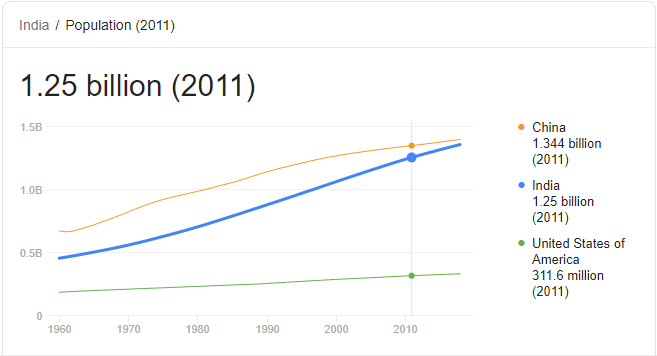

In [89]:
# comparing the census data to a google search 
Image('GoogleSearchIndPop2011.PNG')

We have about 40 million people unaccounted for in this data. This could be because some people did not partake in the census.

Now lets create a bar graph. Since there is 121 languages, I will just graph the top 20.

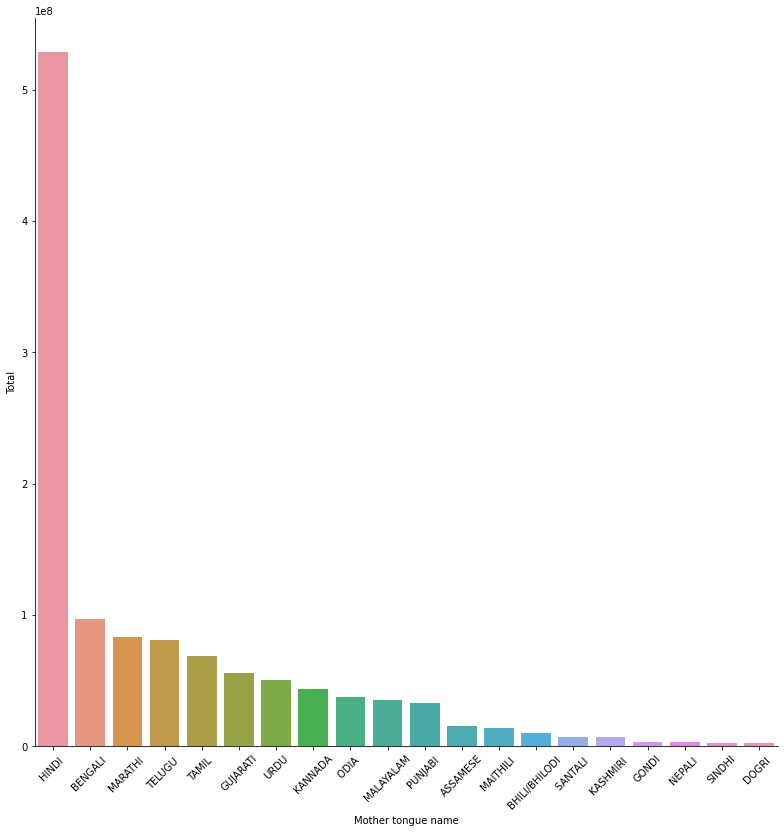

In [90]:
sns.catplot(kind='bar', 
            data=lang_filtered.nlargest(20, 'Total'), 
            x='Mother tongue name', 
            y='Total', 
            height=11
           )
plt.xticks(rotation=45)
plt.show()

## India by region
There a 35 states/unions as of 2011 when the census took place.

create a pallette dictionary to map each language to a color.
https://stackoverflow.com/questions/46173419/seaborn-change-bar-colour-according-to-hue-name

In [91]:
len(lang_indian_states['Area name'].unique())

35

In [92]:
region_options = list(lang_indian_states['Area name'].unique())

menu = widgets.Dropdown(
    options=region_options,
    value='GOA',
    description='Number:',
    disabled=False,
)

def lang_region(region):
    region_df = lang_indian_states[lang_indian_states['Area name'] == region].nlargest(20, 'Total')
    sns.catplot(kind='bar', 
            data=region_df, 
            x='Mother tongue name', 
            y='Total', 
            height=11,
           )
    plt.title(region)
    plt.xticks(rotation=45)
    plt.show()

widgets.interact(lang_region, region=menu)


interactive(children=(Dropdown(description='Number:', index=29, options=('JAMMU & KASHMIR', 'HIMACHAL PRADESH'…

<function __main__.lang_region(region)>